In [1]:
#x_train /= 255????
import os

# Get the current working directory
print( os.getcwd())
os.chdir("/home/kurowskik/data_wb_iad")

/home/kurowskik/data_wb_iad


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

import numpy as np
from imblearn.under_sampling import RandomUnderSampler

import pandas as pd
df_test = pd.read_csv('data/test_split.txt',
                 delimiter = " ",
                  names=["number", "filename", "illness", "data"]
                     )


df_train = pd.read_csv('data/train_split.txt',
                 delimiter = " ",
                names=["number", "filename", "illness", "data"])

dict_test = pd.Series(df_test.illness.values,index=df_test.filename).to_dict() 
dict_train = pd.Series(df_train.illness.values,index=df_train.filename).to_dict() 

rus_train = RandomUnderSampler( random_state = 2137, sampling_strategy = {'COVID-19':1670,'pneumonia':1670,'normal':1670})
X_resampled_train, y_resampled_train = rus_train.fit_resample( np.array([*dict_train.keys()]).reshape(-1,1) , [*dict_train.values()])

rus_test = RandomUnderSampler( random_state = 2137, sampling_strategy = {'COVID-19':100,'pneumonia':100,'normal':100})
X_resampled_test, y_resampled_test = rus_test.fit_resample( np.array([*dict_test.keys()]).reshape(-1,1) , [*dict_test.values()])

train_resampled = dict()

for i in range( len( X_resampled_train)):
    if y_resampled_train[i] == "normal":
        train_resampled[ str( X_resampled_train[i][0])] = 0
    if y_resampled_train[i] == "COVID-19":
        train_resampled[ str( X_resampled_train[i][0])] = 1
    if y_resampled_train[i] == "pneumonia":
        train_resampled[ str( X_resampled_train[i][0])] = 2
    
test_resampled = dict()

for i in range( len( X_resampled_test)):
    if y_resampled_test[i] == "normal":
        test_resampled[ str( X_resampled_test[i][0])] = 0
    if y_resampled_test[i] == "COVID-19":
        test_resampled[ str( X_resampled_test[i][0])] = 1
    if y_resampled_test[i] == "pneumonia":
        test_resampled[ str( X_resampled_test[i][0])] = 2
    


In [3]:
import numpy as np
import os
from PIL import Image
import pandas as pd

In [7]:
img_path = os.path.join("data", "train")

def load_images(names):
    n_images = len(names)
    images = np.zeros((n_images, 224, 224, 3))
    labels = np.empty(n_images, dtype='object')
    for i in range(n_images):
        name = names[i]
        #print(name)
        image = Image.open(os.path.join(img_path, name))
        image = image.convert('RGB').resize((224,224)) #thumbnail
        image = np.asarray(image)
        images[i] = image
        labels[i] = dict_train[name]
    return images, labels

In [5]:
def encode(y):
    y[y=="normal"]=0
    y[y=="COVID-19"]=1
    y[y=="pneumonia"]=2
    return y.astype(int)

print( os.getcwd())

/home/kurowskik/data_wb_iad


In [8]:

X_train, y_train = load_images( list(train_resampled.keys()))
y_train = encode(y_train)

In [12]:
print(X_train[0].shape)

(224, 224, 3)


In [14]:
print( X_train[0,:,:,0].shape)

(224, 224)


In [ ]:
X_train_fft = fft(X_train)

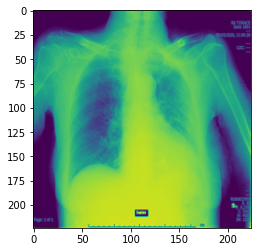

In [89]:
plt.imshow(X_train[3,:,:,0])

In [90]:
def apply_fft( image):
    new_image = np.zeros((224, 224, 3))
    col1 = np.log(abs( np.fft.fft( image[:,:,0]))) #rzutujemy po fft na rzeczywiste
    col2 = np.log(abs( np.fft.fft( image[:,:,0])))
    col3 = np.log(abs( np.fft.fft( image[:,:,0])))
    new_image[:,:,0] = col1
    new_image[:,:,1] = col2
    new_image[:,:,2] = col3
    return new_image
    

In [93]:
def apply_fft_to_many( images_old):
    n_images = len( images_old)
    images = np.zeros((n_images, 224, 224, 3))
    for i in range(n_images):
        images[i] = apply_fft( images_old[i])
    return images

In [63]:
X_train_fft = apply_fft_to_many( X_train)

numpy.complex128

In [116]:
np.save("data/x_train_undersampled_fft.npy", X_train)
np.save("data/y_train_undersampled_fft.npy", y_train)

In [100]:
img_path = os.path.join("data", "train")

def load_images_test(names):
    n_images = len(names)
    images = np.zeros((n_images, 224, 224, 3))
    labels = np.empty(n_images, dtype='object')
    for i in range(n_images):
        name = names[i]
        #print(name)
        image = Image.open("/home/kurowskik/data_wb_iad/data/test/" + name)
        image = image.convert('RGB').resize((224,224)) #thumbnail
        image = np.asarray(image)
        images[i] = image
        labels[i] = test_resampled[name]
    return images, labels

In [101]:
X_test, y_test = load_images_test( list(test_resampled.keys()))

In [118]:
X_test_fft = apply_fft_to_many( X_test)

/home/kurowskik/wbiad3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/kurowskik/wbiad3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/home/kurowskik/wbiad3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


In [117]:
y_test = encode(y_test)

In [119]:
np.save("data/x_test_undersampled_fft.npy", X_test)
np.save("data/y_test_undersampled_fft.npy", y_test)